In [44]:
import re
from pymongo import MongoClient
from elasticsearch import Elasticsearch
from habanero import Crossref, counts, cn
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

Connecting to MongoDB

In [25]:
client = MongoClient('mongo')
metadatadb = client.get_database('narcis')
metacollection = metadatadb.data

Connecting to Elasticsearch

In [26]:
es_host = "elasticsnarcis"
es = Elasticsearch([es_host])
searchindex = 'narcis'
doctype = 'metadata'

Let's look up for some test record in MongoDB database

In [27]:
ID = 'dhs:oai:nkodata.nl:24'
x = metacollection.find({'id': ID})
for item in x:
    print(item)

{'_id': ObjectId('5ced592895ad4447d4361d09'), 'publisher': ['CentERdata, Tilburg University'], 'description': ['Since 1993, CentERdata annually collects economic data through a panel that consists of some two thousand households. The purpose of this DNB Household Survey (formerly known as CentER Savings Survey) is to study the economic and psychological determinants of the saving behavior of households. The data are collected through the CentERpanel, which collects data every week on various topics.\nNot all Dutch people have computers with Internet access, nor do the panel members. Households without a computer and/or Internet access are given the use of a simple computer and Internet access.'], 'language': [], 'format': [], 'type': [], 'rights': ['Access is limited to registered members', 'info:eu-repo/semantics/openAccess'], 'date': ['2014-05-14'], 'datestamp': '2017-08-30 09:24:43', 'relation': [], 'source': [], 'coverage': [], 'contributor': [], 'title': ['DNB Household Survey (DH

Now search for the record with the same ID in Elasticsearch index

In [57]:
res = es.search(index=searchindex, doc_type=doctype, body={"query": {"match": {'id': "%s" % ID }}})
res['hits']['hits']

[{'_index': 'narcis',
  '_type': 'metadata',
  '_id': 'dhs:oai:nkodata.nl:24',
  '_score': 20.73345,
  '_source': {'publisher': ['CentERdata, Tilburg University'],
   'description': ['Since 1993, CentERdata annually collects economic data through a panel that consists of some two thousand households. The purpose of this DNB Household Survey (formerly known as CentER Savings Survey) is to study the economic and psychological determinants of the saving behavior of households. The data are collected through the CentERpanel, which collects data every week on various topics.\nNot all Dutch people have computers with Internet access, nor do the panel members. Households without a computer and/or Internet access are given the use of a simple computer and Internet access.'],
   'language': [],
   'format': [],
   'type': [],
   'rights': ['Access is limited to registered members',
    'info:eu-repo/semantics/openAccess'],
   'date': ['2014-05-14'],
   'datestamp': '2017-08-30 09:24:43',
   're

Finally search for the record with affiliation CentERdata in Elasticsearch will find all records where it was mentioned like 'CentERdata', 'CentERdata, Tilburg University', 'Tilburg, CentERdata' etc.

In [55]:
publisher = 'CentERdata'
res = es.search(index=searchindex, doc_type=doctype, body={"query": {"match": {'publisher': "%s" % publisher }}})
res['hits']['hits']

[{'_index': 'narcis',
  '_type': 'metadata',
  '_id': 'cdata:oai:lissdata.nl:611',
  '_score': 7.4267225,
  '_source': {'publisher': ['CentERdata'],
   'description': ['This is the twenty-sixth Weighing Questionnaire measurement, conducted in February 2013.'],
   'language': [],
   'format': [],
   'type': [],
   'rights': ['2015 CentERdata', 'info:eu-repo/semantics/openAccess'],
   'date': ['2013-02-04'],
   'datestamp': '2017-11-19 16:13:57',
   'relation': [],
   'source': [],
   'coverage': [],
   'contributor': [],
   'title': ['Weighing Project > Weighing Questionnaire > 2013 February'],
   'identifier': ['http://www.dataarchive.lissdata.nl/study_units/view/611'],
   'creator': ['Kooreman', 'P.'],
   'id': 'cdata:oai:lissdata.nl:611',
   'subject': []}},
 {'_index': 'narcis',
  '_type': 'metadata',
  '_id': 'cdata:oai:lissdata.nl:640',
  '_score': 7.4267225,
  '_source': {'publisher': ['CentERdata'],
   'description': ['In July 2012, the second wave of the questionnaire Type\nD p

Let's investigate records with DOI

In [54]:
identifier = 'doi'
res = es.search(index=searchindex, doc_type=doctype, body={"query": {"match": {'identifier': "%s" % identifier }}})
print("Count of records with DOI %s" % str(res['hits']['total']))
res['hits']['hits']

Count of records with DOI 6


[{'_index': 'narcis',
  '_type': 'metadata',
  '_id': 'easy:oai:easy.dans.knaw.nl:easy-dataset:105249',
  '_score': 10.945992,
  '_source': {'publisher': ['Centrum voor Archeologie (Gemeente Amersfoort)'],
   'description': ["Opgravingscode: AP'08"],
   'language': ['nl'],
   'format': ['application/pdf'],
   'type': [],
   'rights': ['info:eu-repo/semantics/openAccess'],
   'date': [],
   'datestamp': '2018-07-13 06:21:33',
   'relation': [],
   'source': [],
   'coverage': [],
   'contributor': ['Centrum voor Archeologie (Gemeente Amersfoort)'],
   'title': ['Appelmarkt: Amersfoort onder ons 26'],
   'identifier': ['doi:10.17026/dans-z47-xk22',
    'urn:nbn:nl:ui:13-uc-7mok',
    'urn:nbn:nl:ui:13-uc-7mok',
    '10.17026/dans-z47-xk22'],
   'creator': ['Wijker, M.K.'],
   'id': 'easy:oai:easy.dans.knaw.nl:easy-dataset:105249',
   'subject': []}},
 {'_index': 'narcis',
  '_type': 'metadata',
  '_id': 'easy:oai:easy.dans.knaw.nl:easy-dataset:108013',
  '_score': 10.332105,
  '_source':

Connecting to Crossref and lookup for some keyword

In [31]:
cr = Crossref()
x = cr.works(query = "archaelogy")
x['message']

{'facets': {},
 'total-results': 56,
 'items': [{'indexed': {'date-parts': [[2019, 2, 15]],
    'date-time': '2019-02-15T08:03:25Z',
    'timestamp': 1550217805075},
   'reference-count': 0,
   'publisher': 'IEEE',
   'content-domain': {'domain': [], 'crossmark-restriction': False},
   'DOI': '10.1109/oceans.1989.592842',
   'type': 'proceedings-article',
   'created': {'date-parts': [[2005, 8, 24]],
    'date-time': '2005-08-24T20:29:31Z',
    'timestamp': 1124915371000},
   'source': 'Crossref',
   'is-referenced-by-count': 0,
   'title': ['The future of marine archaelogy lies in deep water'],
   'prefix': '10.1109',
   'author': [{'given': 'R.F.',
     'family': 'Marx',
     'sequence': 'first',
     'affiliation': []}],
   'member': '263',
   'event': {'name': 'OCEANS', 'location': 'Seattle, WA'},
   'container-title': ['Proceedings OCEANS'],
   'link': [{'URL': 'http://xplorestaging.ieee.org/ielx2/4490/12734/00592842.pdf?arnumber=592842',
     'content-type': 'unspecified',
     '

Count of citations for the publication with specific DOI

In [32]:
counts.citation_count(doi = "10.1016/j.fbr.2012.01.001")

131

Citations count for DOI from NARCIS

In [33]:
narcisdoi = "10.17632/xf4d9vmkvb.1"
counts.citation_count(doi = narcisdoi)

0

Metadata description for the NARCIS record in Crossref

In [35]:
narcisdoi = '10.17026/dans-xpk-wj5w'
cn.content_negotiation(ids = narcisdoi)

'@misc{https://doi.org/10.17026/dans-xpk-wj5w,\n  doi = {10.17026/dans-xpk-wj5w},\n  url = {https://easy.dans.knaw.nl/ui/datasets/id/easy-dataset:65225},\n  author = {Meroño Peñuela, A. and Ashkpour, A. and Guéret, C.},\n  keywords = {Humanities, History, Social sciences, Computer science, RDF, Linked Data, semantic web, Historische Volkstellingen, Census Data, historical censuses, dutch history, Temporal coverage: 1795-1971},\n  language = {nl},\n  title = {CEDAR RDF database, the Dutch historical censuses (1795-1971) as Linked Open Data},\n  publisher = {Data Archiving and Networked Services (DANS)},\n  year = {2016}\n}\n'

Records count overview for the decade

In [37]:
overview = {}
for year in range(2010, 2020):
    res = es.search(index=searchindex, doc_type=doctype, body={"query": {"match": {'date': "%s" % year }}})
    overview[year] = res['hits']['total']
overview

{2010: 4774,
 2011: 4479,
 2012: 4784,
 2013: 4737,
 2014: 4919,
 2015: 4224,
 2016: 3997,
 2017: 4709,
 2018: 637,
 2019: 4}

In [42]:
%matplotlib inline
data = pd.DataFrame(overview.items(), columns=['Date', 'DateValue'])
data

,Date,DateValue
0,2010,4774
1,2011,4479
2,2012,4784
3,2013,4737
4,2014,4919
5,2015,4224
6,2016,3997
7,2017,4709
8,2018,637
9,2019,4


Text(0.5, 1.0, 'NARCIS records overview by years: ')

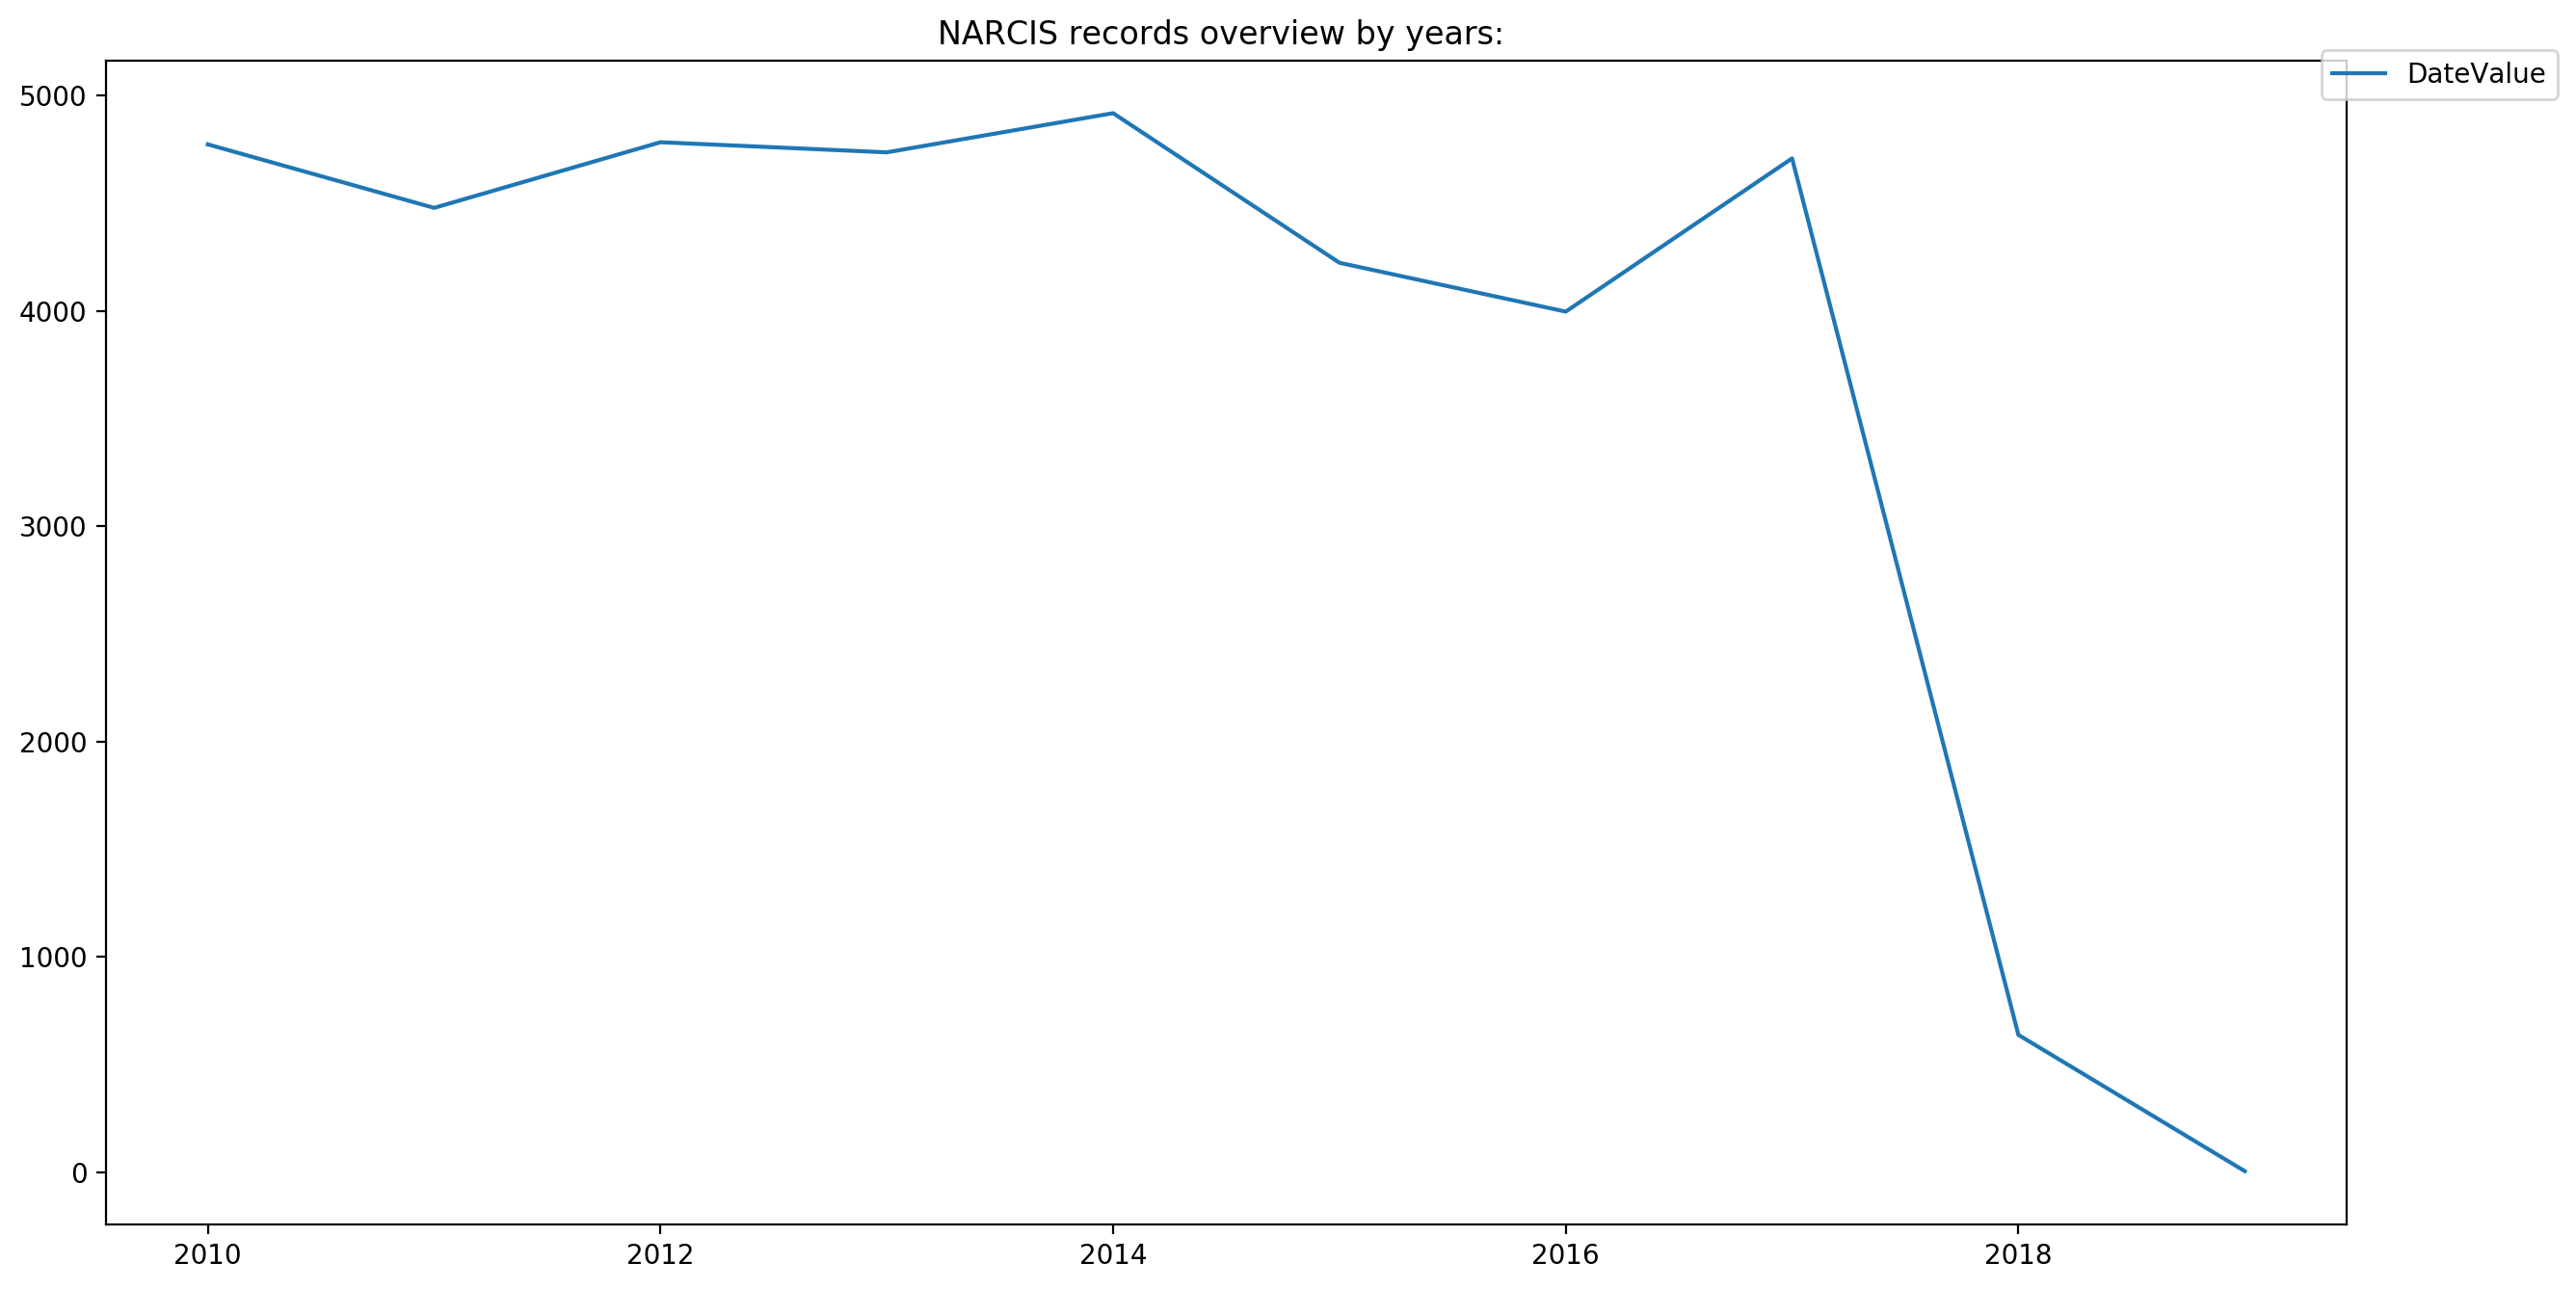

In [49]:
fig, ax = plt.subplots(figsize=(15, 8), dpi=200)
ax.plot(data['Date'], data['DateValue'])
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.02))
plt.title('NARCIS records overview, by years: ')